# Fraud Detection Model (Credit Card Scams)
##### -Mayank Srivastava
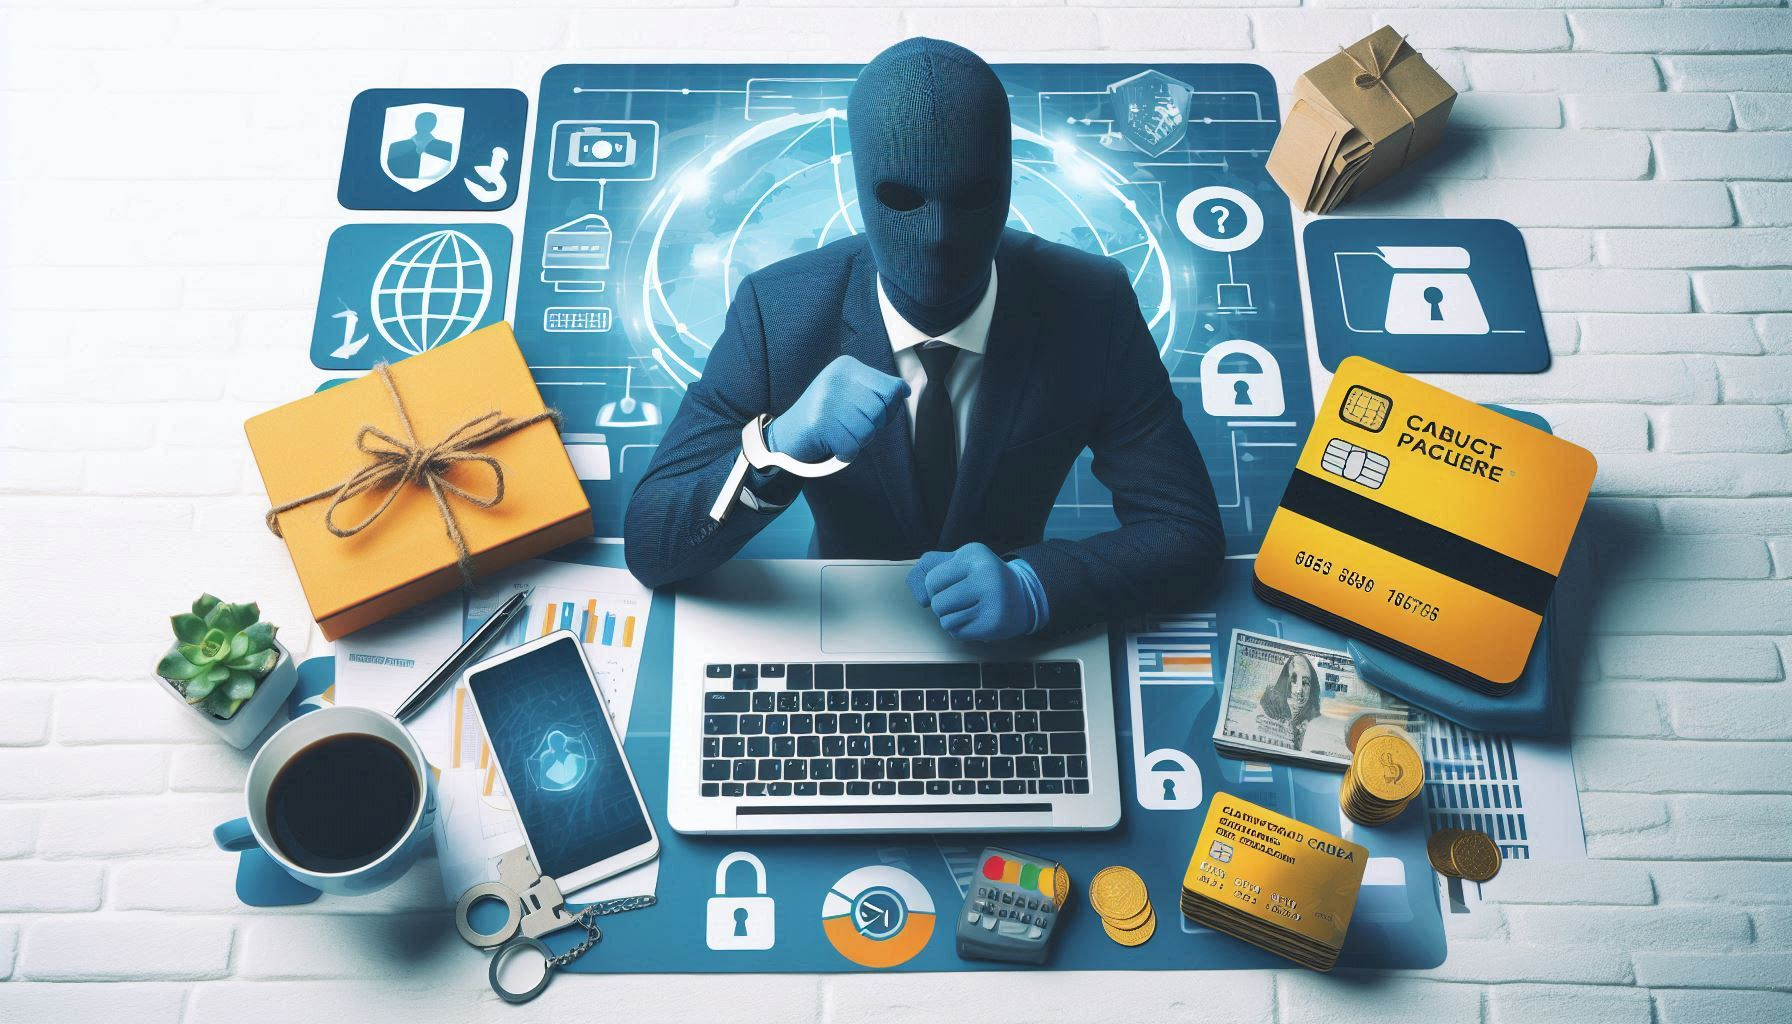

### About the Dataset
In this kernel we will use various predictive models to see how accurate they are in detecting whether a transaction is a normal payment or a fraud. The features are scaled and the names of the features are not shown due to privacy reasons. Nevertheless, we can still analyze some important aspects of the dataset. Let's start!


### Goal:

- EDA of Fraud Transactions
- Create a 50/50 sub-dataframe ratio of "Fraud" and "Non-Fraud" transactions(NearMiss Algorithm).
- Check Classifiers with best accuracy in Fraud Detection.
- Create a Neural Network and compare the accuracy to our best classifier.
- Understand common mistaked made with imbalanced datasets.

## Meta Data

`Time`: Number of seconds elapsed between this transaction and the first transaction in the dataset

`V1-V28`: may be result of a PCA Dimensionality reduction to protect user identities and sensitive features(v1-v28)

`Amount`: Transaction amount

`Class`: 1 for fraudulent transactions, 0 otherwise

## 1. Loading the Dataset:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [2]:
df =pd.read_csv('/kaggle/input/creditcard-csv/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

## 2. Data Exploration and Preprocessing:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# checking for null values
df.isnull().sum().sum()

0

In [6]:
# checking for duplicates
df.duplicated().sum().sum()

1081

In [7]:
# removing duplicate records
df =df.drop_duplicates(keep= 'first')
df.shape

(283726, 31)

> ### Exploratory Data Analysis

In [8]:

x=df.Class.value_counts(normalize =True)
y=df.Class.value_counts()

Text(0.5, 0.98, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

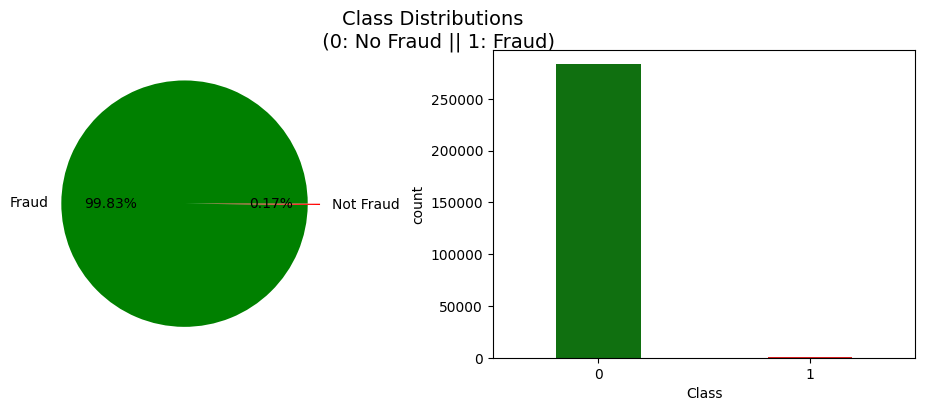

In [9]:
colors =['green','red']
plt.figure(figsize =(12,4))
plt.subplot(1,2,1)
plt.pie(x= x.values, labels =['Fraud','Not Fraud'],autopct ="%1.2f%%",explode =[0.1,0], colors =['green','red']);

plt.subplot(1,2,2)
sns.countplot(data =df, x= 'Class', palette=colors, width =0.4)

plt.suptitle('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [10]:
print('Fraud Transactions count: ', y[1], "out of ",len(df),"records", "\nFraud % in Dataset: ", round(x[1]*100,2),"%")

Fraud Transactions count:  473 out of  283726 records 
Fraud % in Dataset:  0.17 %


In [11]:
f = df[df.Class ==1]
f

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


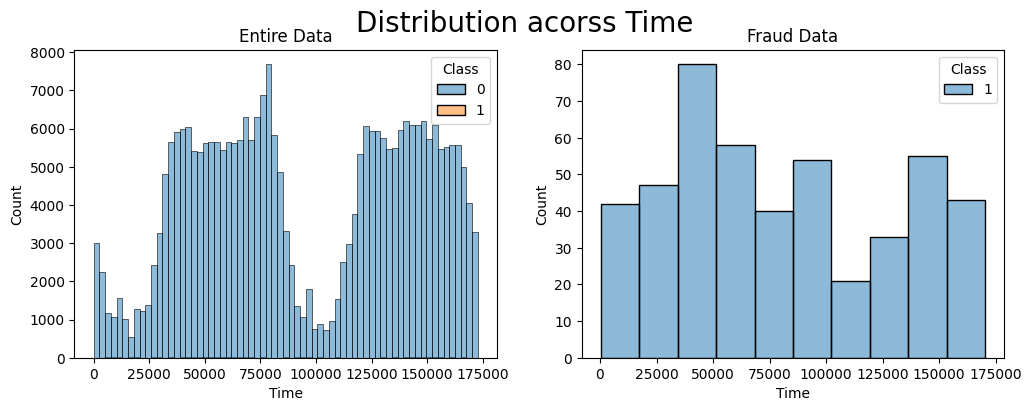

In [12]:
plt.figure(figsize =(12,4))
plt.subplot(1,2,1)
sns.histplot(data= df, x='Time', hue='Class')
plt.title('Entire Data')

plt.subplot(1,2,2)
sns.histplot(data= f, x='Time', hue='Class')
plt.title('Fraud Data')
plt.suptitle('Distribution acorss Time', fontsize= 20)
plt.show()

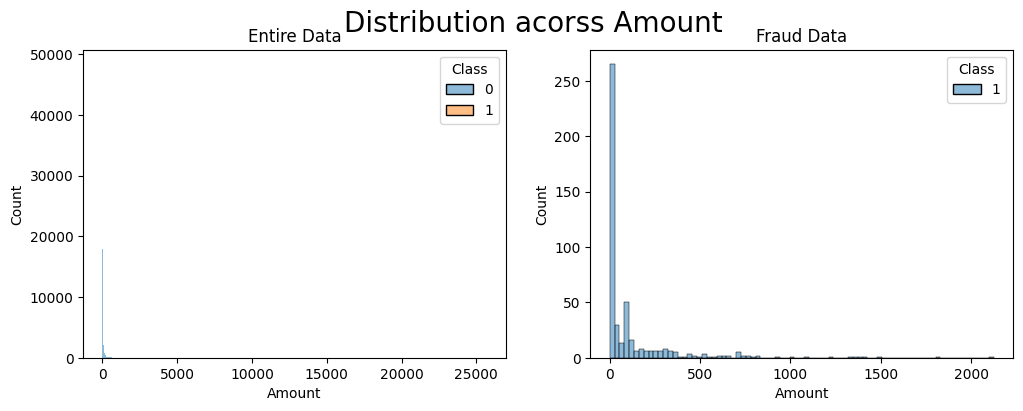

In [13]:
plt.figure(figsize =(12,4))
plt.subplot(1,2,1)
sns.histplot(data= df, x='Amount', hue='Class')
plt.title('Entire Data')
plt.subplot(1,2,2)
sns.histplot(data= f, x='Amount', hue='Class')
plt.title('Fraud Data')
plt.suptitle('Distribution acorss Amount', fontsize= 20)
plt.show()

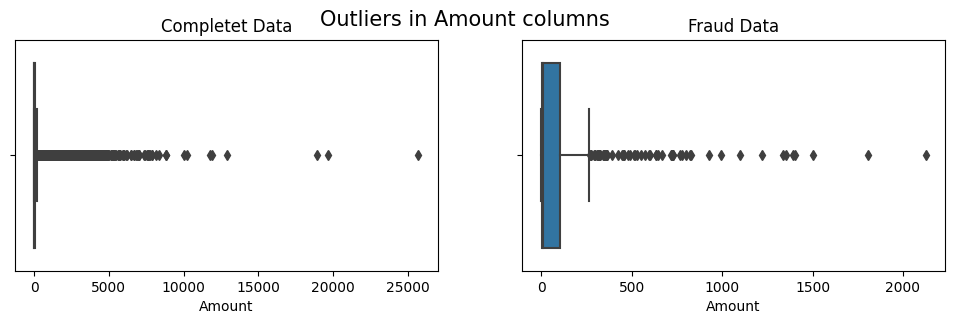

In [14]:
# checking for outliers in Amount
plt.figure(figsize =(12,3))
plt.subplot(1,2,1)
sns.boxplot(data= df, x='Amount', hue='Class')
plt.title('Completet Data')
plt.subplot(1,2,2)
sns.boxplot(data= f, x='Amount', hue='Class')
plt.title('Fraud Data')
plt.suptitle('Outliers in Amount columns', fontsize= 15)
plt.show()

> ### Assigning X & y 

In [15]:
# lest shuffle the data
df=df.sample(frac =1, random_state=42)

In [16]:
X= df.drop('Class', axis= 1)
y= df.Class

>### Train_Test_Split

In [17]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest =train_test_split(X,y, stratify =y, random_state =42)

In [18]:
ytrain.value_counts(normalize =True)

Class
0    0.998332
1    0.001668
Name: proportion, dtype: float64

In [19]:
ytest.value_counts(normalize =True)

Class
0    0.998336
1    0.001664
Name: proportion, dtype: float64

> ### Scaling using RobustScaler()

- Since our Data has large no. of outliers, we can not use MinMaxScaler (its more susceptible to outliers) or StandardScaler
- We can use RobustScaler to handle Scaling of data with outliers
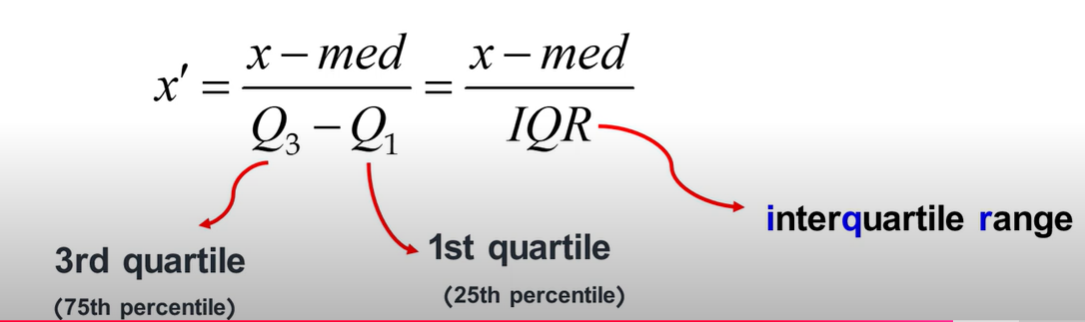

In [20]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
rscaler = RobustScaler()
sscaler= StandardScaler()

In [21]:
xtrain = rscaler.fit_transform(xtrain)
xtest =rscaler.transform(xtest)

>### Class Imbalance Handling

### Majority Under-sampling
One way of handling imbalanced datasets is to reduce the number of observations from all classes but the minority class. The minority class is that with the least number of observations. The most well known algorithm in this group is **random undersampling**, where samples from the targeted classes are removed at random.

We will test our results on 2 undersampling methods:
1. **RandomUnderSampler:** is a fast and easy way to balance the data by randomly selecting a subset of data for the targeted classes.
2. **NearMiss:** adds some heuristic rules to select samples.

    - finds the distance b/w all the instances of the MAJORITY class and the instances of the MINORITY class. 
    - select n- instances of the MAJORITY class that have the smalles distance with MINORITY class and removes them.

In [22]:
from imblearn.under_sampling import RandomUnderSampler, NearMiss

In [23]:
rus = RandomUnderSampler()
us_xtrain,us_ytrain =rus.fit_resample(xtrain, ytrain)

In [24]:
nm=NearMiss()
nm_xtrain,nm_ytrain =nm.fit_resample(xtrain, ytrain)

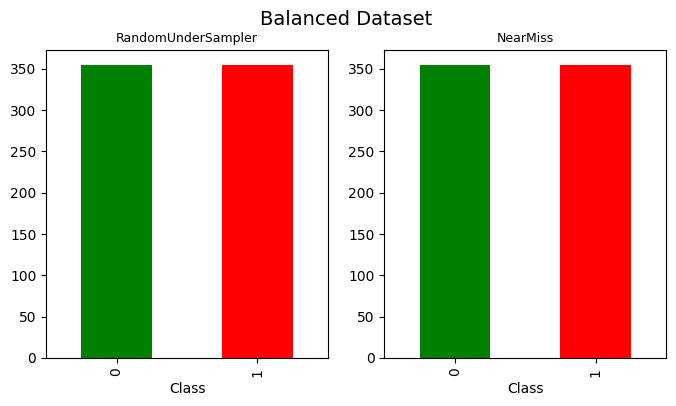

In [25]:
plt.figure(figsize =(8,4))
plt.subplot(1,2,1)
us_ytrain.value_counts().plot(kind ='bar' , color =colors);
plt.title('RandomUnderSampler', fontsize = 9)
plt.subplot(1,2,2)
plt.title('NearMiss',fontsize = 9)
plt.suptitle('Balanced Dataset', fontsize =14)
nm_ytrain.value_counts().plot(kind ='bar' , color =colors);

### Minority Oversampling
1. Random Oversampler --> duplicates existing records
2. Synthetic Minority Oversampling Technique (SMOTE)--> adds variation (data augmentation)
3. ADAptive SYNthetic--> Oversample using Adaptive Synthetic (ADASYN) algorithm.

In [26]:
from imblearn.over_sampling import SMOTE

In [27]:
smote= SMOTE(random_state =42)
smote_xtrain, smote_ytrain = smote.fit_resample(xtrain, ytrain)

In [28]:
smote_xtrain.shape, smote_ytrain.shape

((424878, 30), (424878,))

- SMOTE has created, synthetic data to balance out the minority class in the train dataset

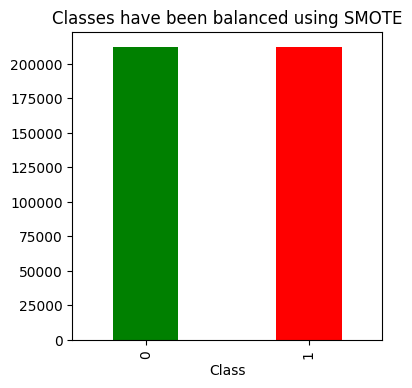

In [29]:
plt.figure(figsize =(4,4))
smote_ytrain.value_counts().plot(kind ='bar' , color =colors, width =0.4);
plt.title('Classes have been balanced using SMOTE');


## 3. Feature Engineering:

In [30]:
#using Feature selection from RandomForest
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=500, random_state=42)

In [31]:
rf.fit(us_xtrain, us_ytrain)

RandomForestClassifier(n_estimators=500, random_state=42)

In [32]:
feat= rf.feature_importances_


In [33]:
col =df.columns[:-1]  # drop 'Class'
col

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [34]:
indices =np.argsort(feat)[::-1] # decreasing sort

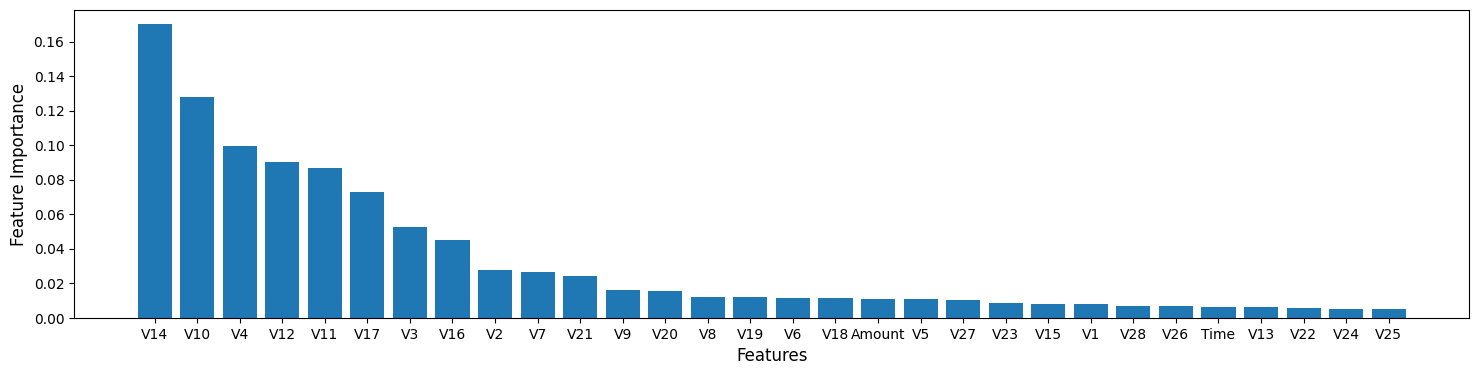

In [35]:
plt.figure(figsize =(18,4))
plt.bar(x=col[indices], height = feat[indices])
plt.ylabel('Feature Importance', fontsize= 12)
plt.xlabel('Features', fontsize= 12);

## 4. Model Development:

>### Model Selection: 

In [36]:
# Training Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [37]:
lr=LogisticRegression()
svc =SVC()
gnb=GaussianNB()
# mnb=MultinomialNB()
dt= DecisionTreeClassifier()
knn=KNeighborsClassifier()
rf= RandomForestClassifier()
ada= AdaBoostClassifier()
bg=BaggingClassifier()
etc= ExtraTreesClassifier()
gb= GradientBoostingClassifier()
xgb= XGBClassifier()

In [38]:
models ={'LR': lr,'SVC' :svc,'DT':dt, "KNN":knn,"RF":rf, "ADA":ada,"BgC":bg,"ETC":etc,"GB":gb,"XGB":xgb, 'GNB':gnb}

In [39]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score, confusion_matrix, classification_report

In [40]:
def training_model(model, xtrain, xtest, ytrain, ytest):
    model.fit(xtrain,ytrain)
    pred= model.predict(xtest)
    print(model)
    print(confusion_matrix(ytest,pred))
    print(classification_report(ytest, pred))
    accuracy =accuracy_score(ytest,pred)
    recall =recall_score(ytest,pred)
    
    return accuracy, recall

>>### Model Metrics with RandomUnderSampling 

In [41]:
accuracy_us=[]
recall_us =[]
for i in models:
    a,r= training_model(models[i],us_xtrain, xtest, us_ytrain, ytest)
    accuracy_us.append(a)
    recall_us.append(r)  

LogisticRegression()
[[67782  3032]
 [    7   111]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     70814
           1       0.04      0.94      0.07       118

    accuracy                           0.96     70932
   macro avg       0.52      0.95      0.52     70932
weighted avg       1.00      0.96      0.98     70932

SVC()
[[68838  1976]
 [   15   103]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     70814
           1       0.05      0.87      0.09       118

    accuracy                           0.97     70932
   macro avg       0.52      0.92      0.54     70932
weighted avg       1.00      0.97      0.98     70932

DecisionTreeClassifier()
[[62944  7870]
 [   12   106]]
              precision    recall  f1-score   support

           0       1.00      0.89      0.94     70814
           1       0.01      0.90      0.03       118

    accuracy                         

>>### Model Metrics with NearMiss UnderSampling 

In [42]:
accuracy_nm=[]
recall_nm =[]
for i in models:
    a,r= training_model(models[i],nm_xtrain, xtest, nm_ytrain, ytest)
    accuracy_nm.append(a)
    recall_nm.append(r)  

LogisticRegression()
[[29732 41082]
 [    3   115]]
              precision    recall  f1-score   support

           0       1.00      0.42      0.59     70814
           1       0.00      0.97      0.01       118

    accuracy                           0.42     70932
   macro avg       0.50      0.70      0.30     70932
weighted avg       1.00      0.42      0.59     70932

SVC()
[[57963 12851]
 [   10   108]]
              precision    recall  f1-score   support

           0       1.00      0.82      0.90     70814
           1       0.01      0.92      0.02       118

    accuracy                           0.82     70932
   macro avg       0.50      0.87      0.46     70932
weighted avg       1.00      0.82      0.90     70932

DecisionTreeClassifier()
[[12673 58141]
 [    5   113]]
              precision    recall  f1-score   support

           0       1.00      0.18      0.30     70814
           1       0.00      0.96      0.00       118

    accuracy                         

>>### Model Metrics with NearMiss UnderSampling 

In [43]:
accuracy_smote=[]
recall_smote =[]
for i in models:
    a,r= training_model(models[i],nm_xtrain, xtest, nm_ytrain, ytest)
    accuracy_smote.append(a)
    recall_smote.append(r)

LogisticRegression()
[[29732 41082]
 [    3   115]]
              precision    recall  f1-score   support

           0       1.00      0.42      0.59     70814
           1       0.00      0.97      0.01       118

    accuracy                           0.42     70932
   macro avg       0.50      0.70      0.30     70932
weighted avg       1.00      0.42      0.59     70932

SVC()
[[57963 12851]
 [   10   108]]
              precision    recall  f1-score   support

           0       1.00      0.82      0.90     70814
           1       0.01      0.92      0.02       118

    accuracy                           0.82     70932
   macro avg       0.50      0.87      0.46     70932
weighted avg       1.00      0.82      0.90     70932

DecisionTreeClassifier()
[[13450 57364]
 [    6   112]]
              precision    recall  f1-score   support

           0       1.00      0.19      0.32     70814
           1       0.00      0.95      0.00       118

    accuracy                         

In [60]:
## Comparing the Scores
result =pd.DataFrame({'accuracy_rus':accuracy_us, 'recall_rus':recall_us,
             'accuracy_nm':accuracy_nm, 'recall_nm':recall_nm,
             'accuracy_smote':accuracy_smote, 'recall_smote':recall_smote},
             index =models.keys())
result.to_excel('result.xlsx')

# Building a Neural Network Model

In [61]:
import tensorflow as tf 
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [62]:
model = Sequential()
model.add(Dense(30, activation ='relu', input_dim =30))
model.add(Dense(15,activation ='relu'))
model.add(Dense(7, activation ='relu'))
model.add(Dense(1, activation ='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [63]:
# RUS
history_us = model.fit(us_xtrain, us_ytrain, epochs=10, batch_size=32, validation_data = (xtest, ytest))
# Evaluate the model on the test data
loss, accuracy = model.evaluate(xtest, ytest)
print('Test loss:', loss)
print('Test accuracy:', accuracy)
# Evaluate the model on the train data
loss, accuracy = model.evaluate(xtrain, ytrain)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 174ms/step - accuracy: 0.3847 - loss: 0.9573 - val_accuracy: 0.2403 - val_loss: 0.7747
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - accuracy: 0.6245 - loss: 0.5552 - val_accuracy: 0.3937 - val_loss: 0.7351
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - accuracy: 0.7181 - loss: 0.4891 - val_accuracy: 0.6535 - val_loss: 0.6593
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - accuracy: 0.8207 - loss: 0.4217 - val_accuracy: 0.8492 - val_loss: 0.5453
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - accuracy: 0.8955 - loss: 0.3631 - val_accuracy: 0.9186 - val_loss: 0.4541
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - accuracy: 0.9257 - loss: 0.3014 - val_accuracy: 0.9376 - val_loss: 0.3942
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - accuracy: 0.9304 - loss: 0.2672 - val_accuracy: 0.9501 - val_loss: 0.3331
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.9257 - loss: 0.2357 - val_accuracy: 0.

In [64]:
pred = model.predict(xtest)
pred =(np.round(pred, 2) > 0.5).astype('int')
print(classification_report(ytest,pred))
print(confusion_matrix(ytest,pred))
print(accuracy_score(ytest, pred))
print(recall_score(ytest, pred))

2217/2217 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     70814
           1       0.03      0.92      0.06       118

    accuracy                           0.96     70932
   macro avg       0.52      0.94      0.52     70932
weighted avg       1.00      0.96      0.98     70932

[[67636  3178]
 [   10   108]]
0.9550555461568826
0.9152542372881356


In [65]:
# NearmIss
history_nm = model.fit(nm_xtrain, nm_ytrain, epochs=10, batch_size=32, validation_data = (xtest, ytest))
# Evaluate the model on the test data
loss, accuracy = model.evaluate(xtest, ytest)
print('Test loss:', loss)
print('Test accuracy:', accuracy)
# Evaluate the model on the train data
loss, accuracy = model.evaluate(xtrain, ytrain)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - accuracy: 0.8494 - loss: 0.3539 - val_accuracy: 0.9663 - val_loss: 0.1945
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.9378 - loss: 0.1886 - val_accuracy: 0.9311 - val_loss: 0.2704
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - accuracy: 0.9619 - loss: 0.1231 - val_accuracy: 0.8965 - val_loss: 0.3416
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step - accuracy: 0.9640 - loss: 0.1235 - val_accuracy: 0.8775 - val_loss: 0.3770
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - accuracy: 0.9711 - loss: 0.0897 - val_accuracy: 0.8486 - val_loss: 0.4329
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - accuracy: 0.9638 - loss: 0.1075 - val_accuracy: 0.8041 - val_loss: 0.5146
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - accuracy: 0.9688 - loss: 0.0951 - val_accuracy: 0.7934 - val_loss: 0.5406
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - accuracy: 0.9707 - loss: 0.0861 - val_accuracy: 0.

In [66]:
pred = model.predict(xtest)
pred =(np.round(pred, 2) > 0.5).astype('int')
print(classification_report(ytest,pred))
print(confusion_matrix(ytest,pred))
print(accuracy_score(ytest, pred))
print(recall_score(ytest, pred))

2217/2217 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
              precision    recall  f1-score   support

           0       1.00      0.73      0.84     70814
           1       0.01      0.94      0.01       118

    accuracy                           0.73     70932
   macro avg       0.50      0.83      0.43     70932
weighted avg       1.00      0.73      0.84     70932

[[51428 19386]
 [    7   111]]
0.7265973044606102
0.940677966101695


In [67]:
# SMOTE
history_sm = model.fit(smote_xtrain, smote_ytrain, epochs=10, batch_size=32, validation_data = (xtest, ytest))
# Evaluate the model on the test data
loss, accuracy = model.evaluate(xtest, ytest)
print('Test loss:', loss)
print('Test accuracy:', accuracy)
# Evaluate the model on the train data
loss, accuracy = model.evaluate(xtrain, ytrain)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Epoch 1/10
13278/13278 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.9821 - loss: 0.0488 - val_accuracy: 0.9960 - val_loss: 0.0219
Epoch 2/10
13278/13278 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9984 - loss: 0.0068 - val_accuracy: 0.9973 - val_loss: 0.0183
Epoch 3/10
13278/13278 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9989 - loss: 0.0050 - val_accuracy: 0.9977 - val_loss: 0.0184
Epoch 4/10
13278/13278 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9990 - loss: 0.0048 - val_accuracy: 0.9977 - val_loss: 0.0175
Epoch 5/10
13278/13278 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9992 - loss: 0.0033 - val_accuracy: 0.9980 - val_loss: 0.0187
Epoch 6/10
13278/13278 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9993 - loss: 0.0032 - val_accuracy: 0.9983 - val_loss: 0.0177
Epoch 7/10
13278/13278 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9995 - loss: 0.0024 - val_accuracy: 0.9981 - val_loss: 0.0164
Epoch 8/10
13278/13278 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 

>> ### Metrics

In [68]:
pred = model.predict(xtest)
pred =(np.round(pred, 2) > 0.5).astype('int')
print(classification_report(ytest,pred))
print(confusion_matrix(ytest,pred))
print(accuracy_score(ytest, pred))
print(recall_score(ytest, pred))

2217/2217 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70814
           1       0.58      0.83      0.69       118

    accuracy                           1.00     70932
   macro avg       0.79      0.91      0.84     70932
weighted avg       1.00      1.00      1.00     70932

[[70744    70]
 [   20    98]]
0.998731179157503
0.8305084745762712


## Results are as follows:

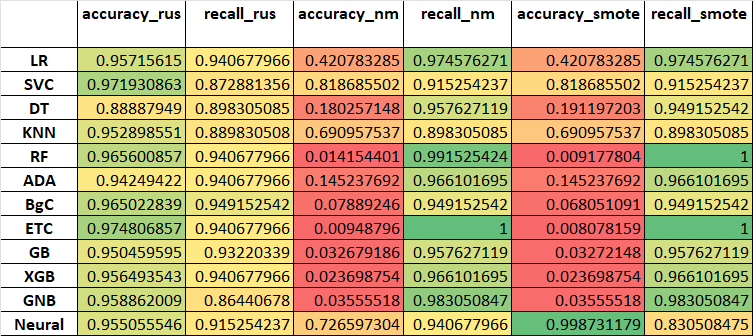

- The Best Model so far is Logistic Regression Classifier with Accuracy of 0.95 and Recall if 0.94

### Mistakes to avoid with Imbalanced Data

1. Ignoring Class Imbalance: Treating the data as if it's balanced can lead to biased models that perform poorly on the minority class.

2. Using Accuracy as the Only Metric: Accuracy can be misleading. Instead, use metrics like Precision, Recall, F1-Score, or AUC-ROC that better reflect performance on imbalanced data.

3. Overlooking Data Preprocessing: Failing to preprocess data correctly, such as not handling missing values or outliers, can negatively impact model performance.

4. Not Resampling the Data: Ignoring techniques like oversampling the minority class (e.g., SMOTE) or undersampling the majority class can result in models that are biased towards the majority class.

5. Relying Solely on Resampling: Over-resampling can lead to overfitting. It's important to combine resampling with robust model selection and evaluation techniques.

6. Not Considering Algorithm Choices: Some algorithms, like decision trees or ensemble methods (e.g., Random Forest, XGBoost), handle imbalance better than others. Avoid using algorithms without considering their effectiveness on imbalanced data.

7. Failing to Use Cost-Sensitive Learning: Ignoring cost-sensitive learning techniques that penalize misclassification of the minority class more heavily can reduce model effectiveness.

8. Neglecting Data Augmentation: Missing the opportunity to use data augmentation techniques to create synthetic examples for the minority class can limit model performance.